# <span style="color:red">                        German Credit Analysis

## PROBLEM STATEMENTS:
We will explore in this data analysis the behavior of German borrowers.
    
   1. Questions such as for what purpose do German borrowers apply for credit loans?, 
   2.How many jobs do each borrower have? ,
   3. What patterns (if any) determine whether the loan will have a good or bad risk ? 
    Of course, many more questions will be answered through our in-depth analysis of German credit borrowers. To make our visualizations more interactive we will be using all our charts, 

##  TABLE OF CONTENTS:
1) Analysis by Type of Group:
a) Gender Analysis
b) Age Groups
c) Wealth Analysis


2) Correlations and Purposes of Loans:
a) Correlations
b) Loan Purpose

3) Modeling:
a) Predictive Modelling

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import  seaborn as sns

In [2]:
### import our data using pandas 
df=pd.read_csv("C:/Users/ELCOT/Desktop/abc/german_credit_data.csv")

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.shape

(1000, 11)

here unnamed columns is nothing about id column ,it does not useful for our model building and data analysis and preprocessing or further steps ,so i  was deleted

In [5]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [6]:
df.drop(columns="Unnamed: 0",inplace=True)

In [7]:
df.shape

(1000, 10)

## EXPLORATARY DATA ANALYSIS:
The first phase of this project is to see what is our data made about. Which variables are numerical or categorical and which columns have "Null" values, which is something we will address in the feature engineering phase

In [8]:
 df.dtypes     ### different data types 

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [9]:
df.info()       ### information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [10]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [11]:
df.isna().sum().sort_values(ascending=False)    #### checking for missing values

Checking account    394
Saving accounts     183
Age                   0
Sex                   0
Job                   0
Housing               0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### distribution of credit amount for each gender


In [12]:
totalcredit=df["Credit amount"].values
malecredits=df["Credit amount"].loc[df.Sex=="male"].values
femalecredits=df["Credit amount"].loc[df.Sex=="female"].values

C:\Users\ELCOT\.conda\envs\dsc_new\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ELCOT\.conda\envs\dsc_new\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ELCOT\.conda\envs\dsc_new\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

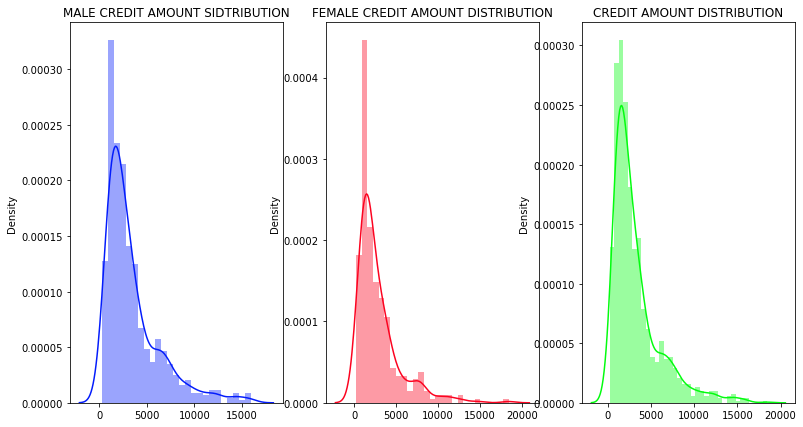

In [13]:
fig,axs=plt.subplots(1,3,figsize=(13,7))
sns.distplot(malecredits,ax=axs[0],color="#031cfc")
axs[0].set_title("MALE CREDIT AMOUNT SIDTRIBUTION")
sns.distplot(femalecredits,ax=axs[1],color="#fc0320")
axs[1].set_title("FEMALE CREDIT AMOUNT DISTRIBUTION")
sns.distplot(totalcredit,ax=axs[2],color="#03fc0f")
axs[2].set_title("CREDIT AMOUNT DISTRIBUTION")
plt.show()

## credit distribution by the purpose


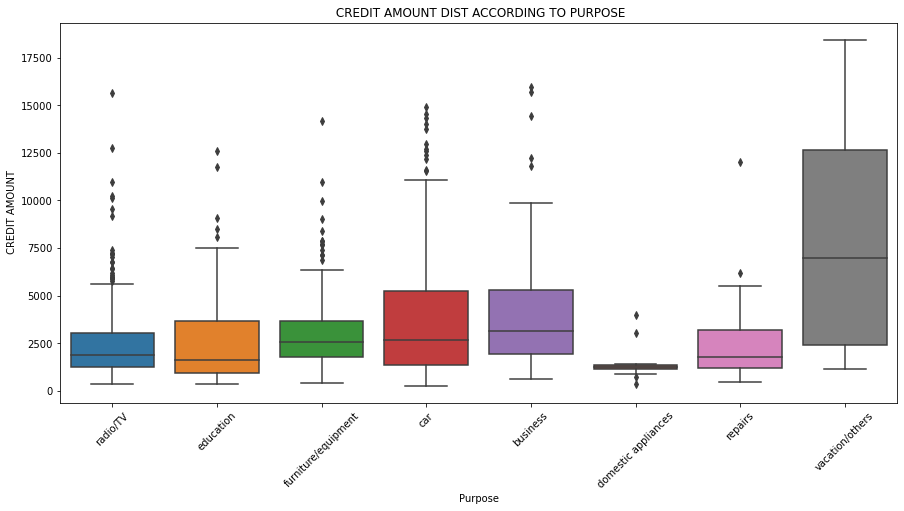

In [14]:
plt.figure(figsize=(15,7))  ### figuare size
b=sns.boxplot(x="Purpose",y="Credit amount",data=df)
b.set_xticklabels(b.get_xticklabels(),rotation=45)
b.set_title(" CREDIT AMOUNT DIST ACCORDING TO PURPOSE")
b.set_ylabel(" CREDIT AMOUNT")
plt.show()


 #### Gender Analysis:
In this section analyze the gender section of our dataset.

#### Objectives:
  * Find the distribution of genders in our dataset.
  * See the distribution o each gender by the age (For instance, we have a higher number of young males than younger females)
  * What were the main application reasons for a credit loan? Does it vary by Gender?
  * How many jobs does each gender have? How many are Unemployed?
### Summary:
* Theres 2x more males than females in our dataset.
* Most females that applied for a credit loan were less than 30 .
* Most of the males that applied for a loan ranged from their 20s-40s
* Females were more likely to apply for a credit loan tobuy furniture and equipment. (10% more than males)
* Males applied 2x more than females for a credit loan to invest in a business.
* 2x of females were unemployed compared to males.
* 2x of males worked 3 jobs compared to females.
* Suprisingly, most people that applied for a credit loan have two jobs!

In [15]:
df["Sex"].value_counts()        ### males are two times of females to take loans

male      690
female    310
Name: Sex, dtype: int64

<AxesSubplot:>

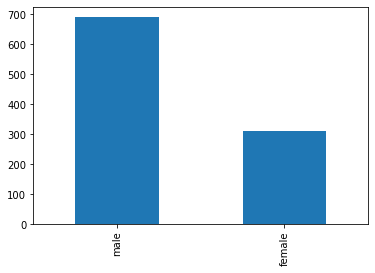

In [16]:
df["Sex"].value_counts().plot(kind="bar")   

In [17]:
df["Purpose"].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [18]:
### lets see the purpose of having credit loan of each gender
k=pd.crosstab(df["Purpose"],df["Sex"]).apply(lambda x:x/x.sum()*100)  

In [19]:
k

Sex,female,male
Purpose,,
business,6.129032,11.304348
car,30.322581,35.217391
domestic appliances,1.935484,0.869565
education,7.741935,5.072464
furniture/equipment,23.870968,15.507246
radio/TV,27.419355,28.260870
repairs,1.612903,2.463768
vacation/others,0.967742,1.304348


<Figure size 720x576 with 0 Axes>

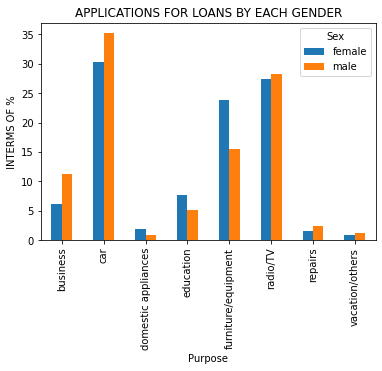

In [20]:
plt.figure(figsize=(10,8))
k.plot(kind="bar")
plt.title("APPLICATIONS FOR LOANS BY EACH GENDER")
plt.ylabel(" INTERMS OF % ")
plt.show()

In [21]:
m=pd.crosstab(df["Job"],df["Sex"]).apply(lambda x: x/x.sum()*100)

In [22]:
m     ###  percentage of number of jobs by each gender 

Sex,female,male
Job,,
0,3.870968,1.449275
1,20.645161,19.710145
2,63.548387,62.753623
3,11.935484,16.086957


<AxesSubplot:xlabel='Job'>

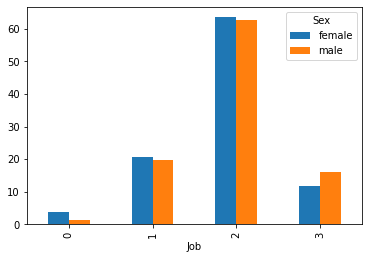

In [23]:
m.plot(kind="bar")                  ### the people who are takes loans generally  have 2 jobs

## Age Groups:
In this section we will create categorical groups based on the age column. The following categorical variables will belong to the "Age_Group" column:

* Young: Clients age ranges from (19 - 29).
* Young Adults: Clients age ranges from (30-40)
* Senior: Clients age ranges from (41-55)
* Elder: Clients age is more than 55 years old
### What we want to accomplish:
* Create different age groups based on their age.
* See the Credit amounts borrowed by clients belonging to each age group.
* Get deeper in our analysis and determine which loans were high risk and see if there is any patterns with regards to age groups.
#### Summary:
* The younger age group tended to ask slightly for higher loans compared to the older age groups.
* The young and elederly groups had the highest ratio of high risk loans. With 45.29% of all the clients that belong to the young age group being considered of high risk.
* The number of loans that were considered of high risk within the elderly group is 44.28% of the total amount of people considered in the elderly group.
* Interesting enough these are the groups that are most likely to be unemployed or working part-time, since the youngest group either don't have the experience to have a job or they are studying in a university so they don't have enough time to work in a full-time job.
* In the elderly group side, this is the group that are most likely receiving their money from their pensions, meaning the elderly group is most likely unemployed or working part-time.

In [24]:
df.Age.max()

75

In [25]:
### lets create a categorical feature for age column
df["Age group"]=pd.cut(df.Age,bins=[19,29,40,55,75],labels=["young","young adults","senior","elder"])  

In [26]:
df["Age group"]

0             elder
1             young
2            senior
3            senior
4            senior
           ...     
995    young adults
996    young adults
997    young adults
998           young
999           young
Name: Age group, Length: 1000, dtype: category
Categories (4, object): ['young' < 'young adults' < 'senior' < 'elder']

In [27]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,elder
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,young
2,49,male,1,own,little,NaN,2096,12,education,good,senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,senior
4,53,male,2,free,little,little,4870,24,car,bad,senior


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ELCOT\.conda\envs\dsc_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age group', ylabel='Credit amount'>

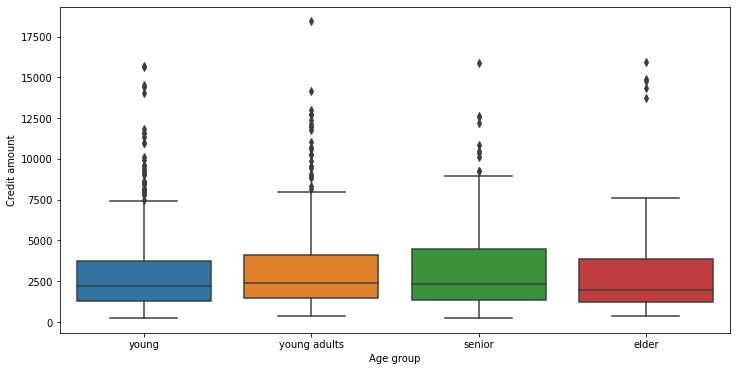

In [29]:
#### distribution of credit amount by group wise
plt.figure(figsize=(12,6))
sns.boxplot(df["Age group"],df["Credit amount"])

In [30]:
ele=pd.crosstab(df["Risk"],df["Age group"]).apply(lambda x:x/x.sum()*100)

In [31]:
### percentage of bad credit by each age group
ele

Age group,young,young adults,senior,elder
Risk,,,,
bad,36.856369,25.633803,26.108374,26.760563
good,63.143631,74.366197,73.891626,73.239437


<AxesSubplot:xlabel='Risk'>

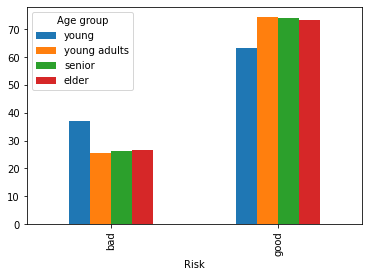

In [32]:
### the most bad loans are takes by elders and young ade groups
ele.plot(kind="bar")

<AxesSubplot:xlabel='Age group', ylabel='Credit amount'>

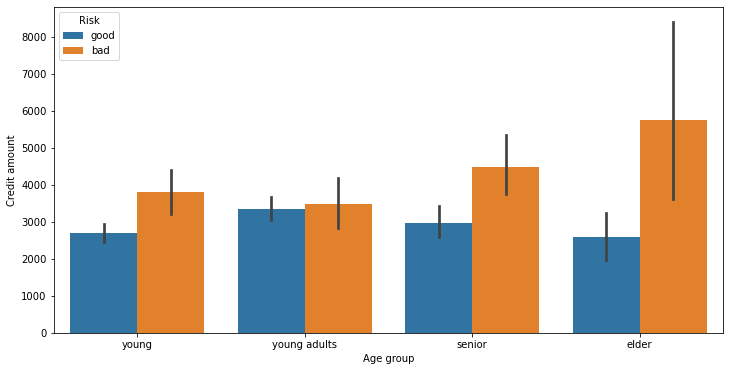

In [33]:
#### more credit are taken by elders
plt.figure(figsize=(12,6))
sns.barplot(x="Age group",y="Credit amount",hue="Risk",data=df)

## Wealth Analysis:
In this section we will analyse the amount of wealth our clients have by analyzing their 
* checking accounts and 
* whether the wealth status of our clients contribute to the risk of the loans Lending Club is issuing to customers.

### Summary:
* Individuals belonging to the "little wealth" group, had a higher probability of being bad risk loans than other types fo groups.
* The higher the wealth, the lower the probability of being a bad risk loan.

In [34]:
df["Checking account"]

0        little
1      moderate
2           NaN
3        little
4        little
         ...   
995         NaN
996      little
997         NaN
998      little
999    moderate
Name: Checking account, Length: 1000, dtype: object

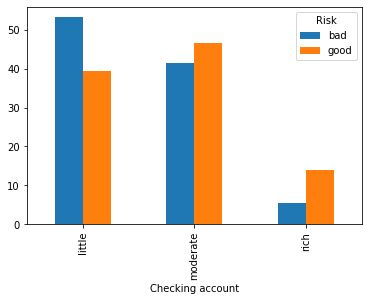

In [35]:
ele2=pd.crosstab(df["Checking account"],df["Risk"]).apply(lambda x:x/x.sum()*100).plot(kind="bar")

In [36]:
ele2

<AxesSubplot:xlabel='Checking account'>

### Correlation (Our intent):
In this part of the analysis, we want to look as to what feature affect directly the risk of the loan. In order to see these patterns, the first thing we have to do is to create a new column named "Risk_int" (Stands for risk in integer form) and involve this column in the correlation heatmap plot. "0" will stand for "bad risk" loans and "1" will stand for "good risk" loans.

#### Summary:
* The higher the credit amount borrowed, the most likely the loan will end up bad.
* The higher the duration of the loan, the most likely the loan will turn out to be bad
* Senior and Elders that asked for loans over 12k, have a high chance of becoming bad loans
* If the credit amount borrowed is equivalent to 11,000 or more, the probability for the loan to be a bad one increases drastically. (Observe the Correlation of Risk with Credit Amount Borrowed.)


In [43]:
df["Risk_dummies"]=pd.get_dummies(df["Risk"],drop_first=True)

In [44]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age group,Risk_dummies
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,elder,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,young,0
2,49,male,1,own,little,NaN,2096,12,education,good,senior,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,senior,1
4,53,male,2,free,little,little,4870,24,car,bad,senior,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good,young adults,1
996,40,male,3,own,little,little,3857,30,car,good,young adults,1
997,38,male,2,own,little,NaN,804,12,radio/TV,good,young adults,1
998,23,male,2,free,little,little,1845,45,radio/TV,bad,young,0


<AxesSubplot:>

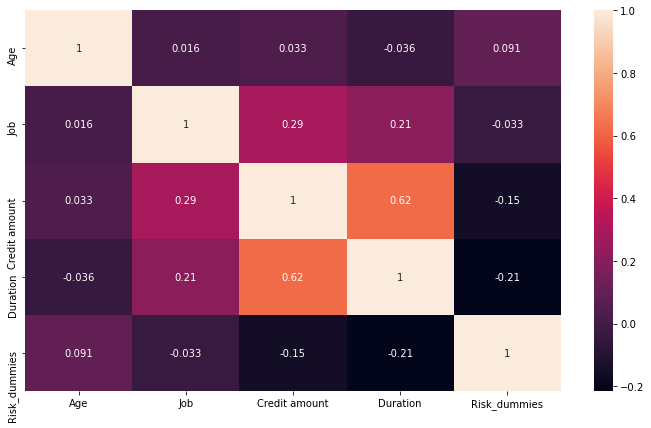

In [45]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

<BarContainer object of 1000 artists>

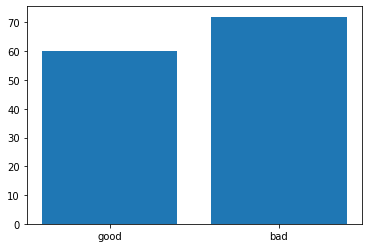

In [46]:
plt.bar(df["Risk"],df["Duration"])

C:\Users\ELCOT\.conda\envs\dsc_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration', ylabel='Credit amount'>

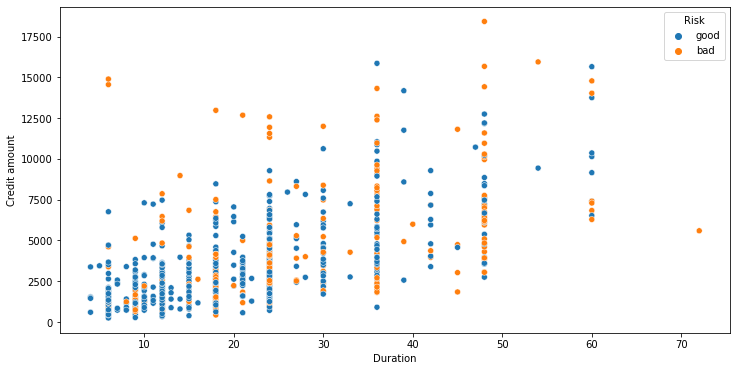

In [47]:
plt.figure(figsize=(12,6))
sns.scatterplot("Duration","Credit amount",hue="Risk",data=df,markers=True)

<Figure size 864x576 with 0 Axes>

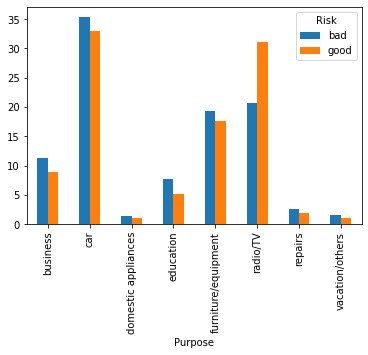

In [48]:
plt.figure(figsize=(12,8))
pd.crosstab(df["Purpose"],df["Risk"]).apply(lambda x:x/x.sum()*100).plot(kind="bar")
plt.show()

C:\Users\ELCOT\.conda\envs\dsc_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purpose', ylabel='Credit amount'>

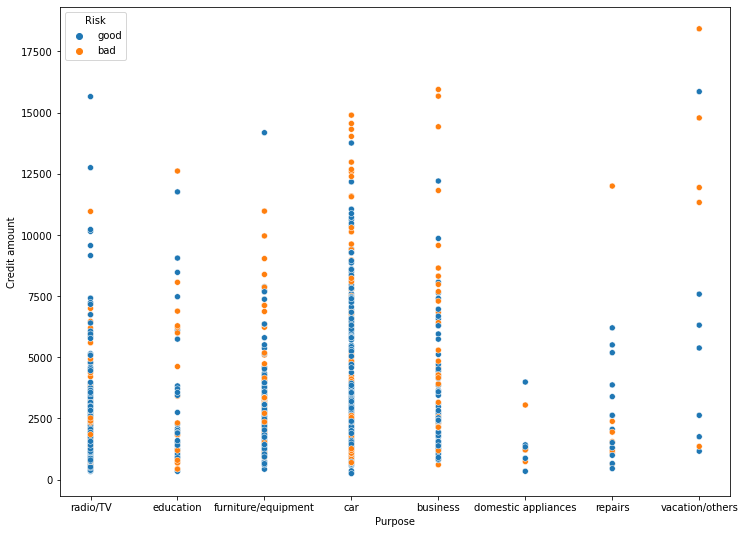

In [49]:
plt.figure(figsize=(12,9))
sns.scatterplot("Purpose","Credit amount",data=df,hue="Risk")

## HANDLING MISSING VALUES

In [50]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
Age group             2
Risk_dummies          0
dtype: int64

In [51]:
### risk dummies column is the one of output if  we delete it may chance to accur data lekage
df.drop(columns="Risk_dummies",inplace=True)

In [52]:
df["Saving accounts"].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [53]:
#### filling of saving account column nan values with most repeated values
df["Saving accounts"].fillna(df["Saving accounts"].value_counts().index[0],inplace=True)

In [54]:
df["Saving accounts"].isna().sum()

0

In [55]:
df["Checking account"].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [56]:
### filling of checking account column value with most repeated value
df["Checking account"].fillna(df["Checking account"].value_counts().index[0],inplace=True)

In [57]:
df.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
Age group           2
dtype: int64

In [58]:
df.drop(columns="Age group",inplace=True)

<AxesSubplot:>

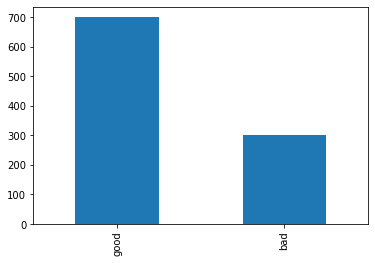

In [59]:
  ### not that much imbalnced our data we can proceed
df["Risk"].value_counts().plot(kind="bar")

### train/Test Split
the data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.



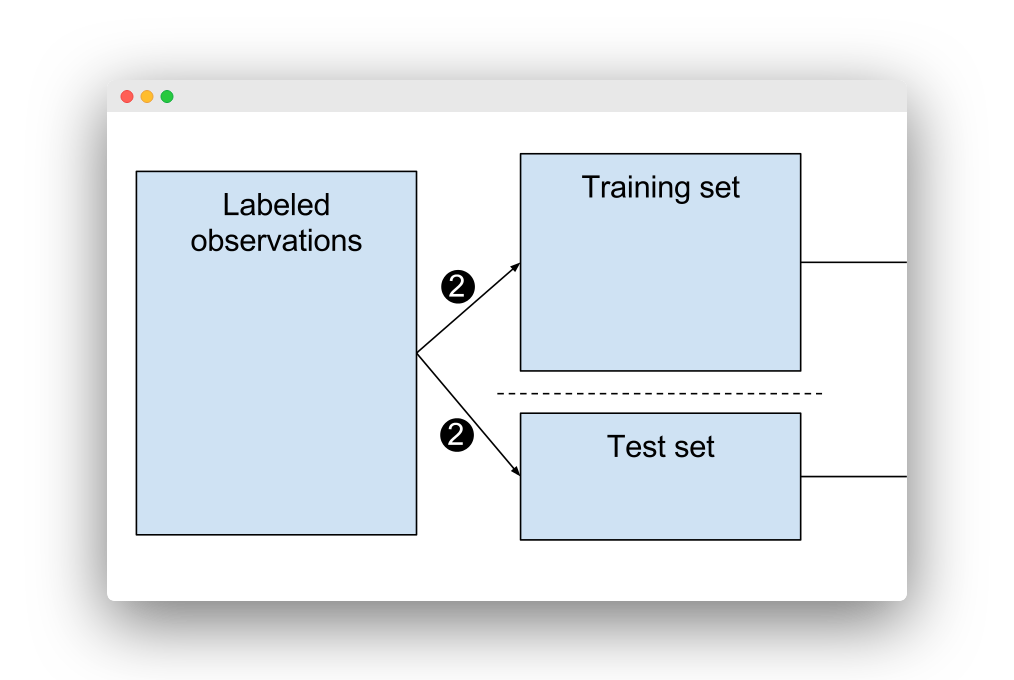

In [60]:
x=df.copy()

In [61]:
x

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,little,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [62]:
x=pd.get_dummies(x,drop_first=True)

In [63]:
x

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,67,2,1169,6,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,22,2,5951,48,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,49,1,2096,12,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,45,2,7882,42,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,53,2,4870,24,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
996,40,3,3857,30,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
997,38,2,804,12,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
998,23,2,1845,45,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [64]:
y=x.Risk_good

In [65]:
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk_good, Length: 1000, dtype: uint8

In [66]:
x.drop(columns="Risk_good",inplace=True)

In [67]:
x

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,49,1,2096,12,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
996,40,3,3857,30,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
997,38,2,804,12,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
998,23,2,1845,45,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=10)

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
sc=StandardScaler()

In [73]:
x_train=sc.fit_transform(x_train)

In [74]:
x_test=sc.transform(x_test)

In [75]:
randomforest=RandomForestClassifier()

In [87]:
model=randomforest.fit(x_train,y_train)

In [88]:
y_pred=model.predict(x_test)

In [78]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### classification_report:

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.23      0.33       105
           1       0.72      0.93      0.81       225

    accuracy                           0.71       330
   macro avg       0.67      0.58      0.57       330
weighted avg       0.69      0.71      0.66       330



### accuracy:

In [80]:
accuracy_score(y_test,y_pred)

0.7090909090909091

### confusion matrix:

In [81]:
cm=confusion_matrix(y_test,y_pred)

[[ 20  85]
 [ 11 214]]


<AxesSubplot:>

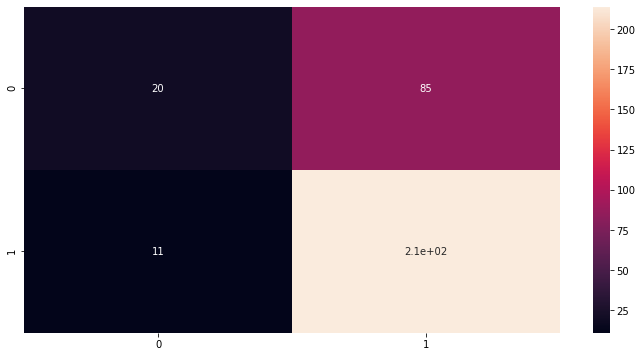

In [84]:
print(cm)
plt.figure(figsize=(12,6))
sns.heatmap(cm,annot=True)

### roc_auc_score and roc_curve: 

In [85]:
from  sklearn.metrics import roc_auc_score,roc_curve

In [93]:
y_pred_prob=model.predict_proba(x_test)[::,1]  ### prediction interms of probabailities


In [94]:
y_pred_prob

array([0.67, 0.92, 0.76, 0.88, 0.39, 0.81, 0.66, 0.68, 0.36, 0.85, 0.27,
       0.48, 0.74, 0.89, 0.74, 0.44, 0.67, 0.7 , 0.96, 0.28, 0.72, 0.91,
       0.77, 0.48, 0.79, 0.86, 0.78, 0.69, 0.77, 0.61, 0.24, 0.54, 0.98,
       0.75, 0.8 , 0.57, 0.62, 0.35, 0.55, 0.67, 0.83, 0.69, 0.7 , 0.67,
       0.94, 0.59, 0.81, 0.63, 0.52, 0.44, 0.84, 0.79, 0.96, 0.66, 0.63,
       0.49, 0.8 , 0.86, 0.62, 0.88, 0.82, 0.64, 0.77, 0.61, 0.66, 0.69,
       0.74, 0.75, 0.14, 0.89, 0.24, 0.43, 0.69, 0.84, 0.78, 0.74, 0.66,
       0.62, 0.69, 0.88, 0.67, 0.96, 0.6 , 0.82, 0.94, 0.81, 0.63, 0.37,
       0.91, 0.48, 0.83, 0.9 , 0.77, 0.69, 0.96, 0.62, 0.51, 0.88, 0.51,
       0.61, 0.79, 0.66, 0.95, 0.77, 0.92, 0.68, 0.53, 0.81, 0.75, 0.88,
       0.74, 0.93, 0.69, 0.72, 0.66, 0.46, 0.68, 0.81, 0.55, 0.55, 0.77,
       0.72, 0.61, 0.99, 0.85, 0.72, 0.59, 0.8 , 0.56, 0.98, 0.85, 0.74,
       0.52, 0.54, 0.73, 0.79, 0.87, 0.86, 0.57, 0.8 , 0.29, 0.81, 0.91,
       0.97, 0.88, 0.73, 0.97, 0.72, 0.7 , 0.82, 0.

In [95]:
print("ROC_AUC_SCORE:.......{}".format(roc_auc_score(y_test,y_pred_prob)))

ROC_AUC_SCORE:.......0.6661164021164021


In [96]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

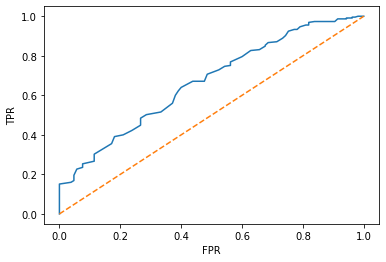

In [98]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle="--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
